### importation part

In [1]:
# importing os module to check if the dataset is available in the current folder
import os
print(os.listdir('./dataset/'))

['911.csv']


In [2]:
# importing neccessary libraries to work with the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# for inline plotting - does not require to externally use plt.show()
%matplotlib inline

### DataFrame Creation

In [4]:
# loading the dataset from csv file
dataFrame = pd.read_csv(filepath_or_buffer = './dataset/911.csv')

In [5]:
# getting information about the dataFrame
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289240 entries, 0 to 289239
Data columns (total 9 columns):
lat          289240 non-null float64
lng          289240 non-null float64
desc         289240 non-null object
zip          253942 non-null float64
title        289240 non-null object
timeStamp    289240 non-null object
twp          289137 non-null object
addr         289240 non-null object
e            289240 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 14.3+ MB


In [6]:
# checking the head of the dataFrame
dataFrame.head(n = 10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 16:46:48,HORSHAM,LAUREL AVE & OAKDALE AVE,1
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 16:17:05,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 16:51:42,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:35:41,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1


### Getting data insights

In [7]:
# top 5 zip codes calling 911
dataFrame['zip'].value_counts().head(n = 5)

19401.0    19821
19464.0    19276
19403.0    14524
19446.0    13939
19406.0     9601
Name: zip, dtype: int64

In [8]:
# top 10 township reaching 911
dataFrame['twp'].value_counts().head(n = 10)

LOWER MERION        24826
ABINGTON            17820
NORRISTOWN          16546
UPPER MERION        15288
CHELTENHAM          13359
POTTSTOWN           12039
UPPER MORELAND       9852
LOWER PROVIDENCE     9547
PLYMOUTH             8720
HORSHAM              8159
Name: twp, dtype: int64

In [9]:
# unique reasons to call 911
dataFrame['title'].nunique()

131

### Creating Specific type column for calling 911

In [10]:
# adding a specific_type col by splitting title from the dataFrame
dataFrame['specific_type'] = dataFrame['title'].apply(lambda title: title.split(':')[0])

In [11]:
# checking the dataFrame head and unique type
dataFrame.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,specific_type
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [12]:
print(dataFrame['specific_type'].nunique())

3


In [13]:
dataFrame['specific_type'].value_counts()

EMS        144362
Traffic    101889
Fire        42989
Name: specific_type, dtype: int64

### Creating Specific reason column for calling 911

In [14]:
# adding a specific_reason col by splitting title from the dataFrame
dataFrame['specific_reason'] = dataFrame['title'].apply(lambda title: title.split(':')[1])

In [15]:
# checking the dataFrame head and unique reasons
dataFrame.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,specific_type,specific_reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS


In [16]:
print(dataFrame['specific_reason'].nunique())

89


In [17]:
# top 10 reasons for calling 911
dataFrame['specific_reason'].value_counts().head(10)

 VEHICLE ACCIDENT -       68123
 DISABLED VEHICLE -       20667
 VEHICLE ACCIDENT         16747
 FIRE ALARM               16359
 RESPIRATORY EMERGENCY    14637
 FALL VICTIM              14584
 CARDIAC EMERGENCY        14491
 ROAD OBSTRUCTION -        8767
 SUBJECT IN PAIN           8151
 HEAD INJURY               7613
Name: specific_reason, dtype: int64

### Visualizing the insight dataset

#### Visualizing the top specific type

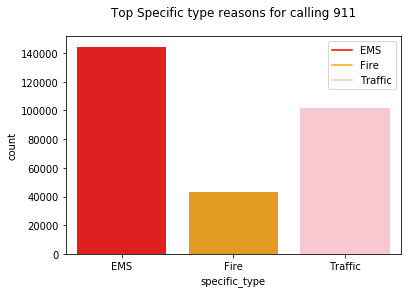

In [18]:
# plotting a countplot for specific_type
plt.plot([],[], color = 'red', label = 'EMS')
plt.plot([],[], color = 'orange', label = 'Fire')
plt.plot([],[], color = 'pink', label = 'Traffic')
plt.title(label = 'Top Specific type reasons for calling 911', pad = 20)
plt.legend()
sns.countplot(x = 'specific_type', data = dataFrame, palette = ['red', 'orange', 'pink'])

### Converting timestamp from object to real time stamp type

In [19]:
dataFrame['timeStamp'] = pd.to_datetime(dataFrame['timeStamp'])

In [20]:
# to check the timeStamp info
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289240 entries, 0 to 289239
Data columns (total 11 columns):
lat                289240 non-null float64
lng                289240 non-null float64
desc               289240 non-null object
zip                253942 non-null float64
title              289240 non-null object
timeStamp          289240 non-null datetime64[ns]
twp                289137 non-null object
addr               289240 non-null object
e                  289240 non-null int64
specific_type      289240 non-null object
specific_reason    289240 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 17.7+ MB


In [21]:
dataFrame.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,specific_type,specific_reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS


### To add col's for Hour, Month and Day of the week

In [22]:
# creaing 3 col's hour, month, day
dataFrame['hour'] = dataFrame['timeStamp'].apply(lambda time: time.hour)
dataFrame['month'] = dataFrame['timeStamp'].apply(lambda time: time.month)
dataFrame['day'] = dataFrame['timeStamp'].apply(lambda time: time.dayofweek)

In [23]:
dataFrame.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,specific_type,specific_reason,hour,month,day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,14,12,3


### Visualizing the hour, month and day of calling 911

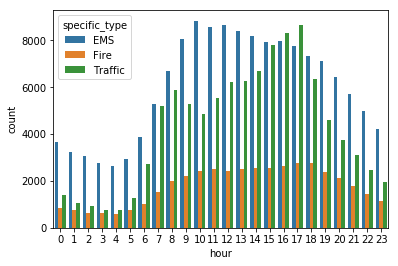

In [27]:
# plotting for hour
sns.countplot(x = 'hour', data = dataFrame, hue = 'specific_type')

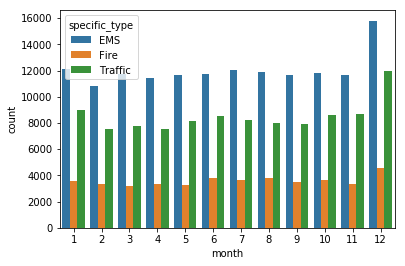

In [28]:
# plotting for month
sns.countplot(x = 'month', data = dataFrame, hue = 'specific_type')

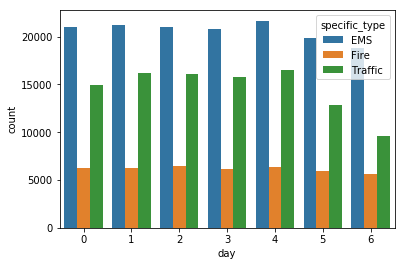

In [29]:
# plotting for day
sns.countplot(x = 'day', data = dataFrame, hue = 'specific_type')

### Grouping data to find out the most calling day for 911

In [30]:
# grouping by day of the week
groupDay = dataFrame.groupby('day').count()

In [31]:
# to check head
groupDay.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,specific_type,specific_reason,hour,month
day,,,,,,,,,,,,,
0,42092,42092,42092,37030,42092,42092,42081,42092,42092,42092,42092,42092,42092
1,43744,43744,43744,38385,43744,43744,43731,43744,43744,43744,43744,43744,43744
2,43442,43442,43442,38327,43442,43442,43422,43442,43442,43442,43442,43442,43442
3,42784,42784,42784,37616,42784,42784,42770,42784,42784,42784,42784,42784,42784
4,44468,44468,44468,38923,44468,44468,44450,44468,44468,44468,44468,44468,44468


#### Visualizing the grouped data

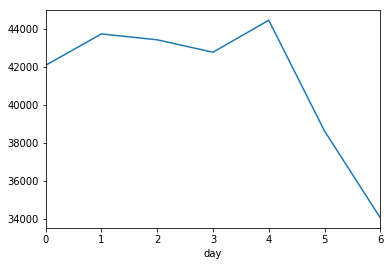

In [32]:
groupDay['twp'].plot()